# 🏗️ Build-Up Week 3
> EPOCH 3기 한우림

> 2025.09.04. THU

> 데싸노트의 실전에서 통하는 머신러닝

# 💬 07장 나이브 베이즈

나이브 베이즈: 베이즈 정리를 적용한 조건부 확률 기반의 분류 모델
> 조건부 확률: A가 일어났을 때 B가 일어날 확률 $P(B|A)=\frac{P(A,B)}{P(A)}$

최근에는 딥러닝이 자연어 처리에 탁월한 모습을 보여 주지만 딥러닝보다 간단한 방법으로 자연어 처리를 원한다면 *나이브 베이즈* 는 좋은 선택!

## 7.1 문제 정의: 한눈에 보는 예측 목표
- 스팸 문자 여부 판별
- spam dataset
    - 독립변수: text -> 하나의 변수에 긴 문장 형태의 데이터 존재
    > 많은 전처리 필요

## 7.2 라이브러리 및 데이터 불러오기 & 데이터 확인

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/spam.csv'
data = pd.read_csv(file_url)

In [3]:
data.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
data['target'].unique()

array(['ham', 'spam'], dtype=object)

`target`
- `spam`: 스팸 문자
- `ham`: 스팸이 아닌 문자

## 7.3 특수 기호 제거하기

쉼표, 마침표와 같은 특수 기호 제거

In [ ]:
import string # 특수 기호 목록

In [7]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

1. 문자열에서 문자를 하나씩 꺼내 특수 기호인지 판단
    - 특수 기호가 아닌 문자들만 리스트에 저장
2. 각 문자를 문장으로 합침
3. 문자열이 문장별로 행에 저장되게 변환

In [8]:
sample_string = data['text'].loc[0]
sample_string

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [9]:
# 문자열의 문자를 하나씩 출력
for i in sample_string:
    print(i)

G
o
 
u
n
t
i
l
 
j
u
r
o
n
g
 
p
o
i
n
t
,
 
c
r
a
z
y
.
.
 
A
v
a
i
l
a
b
l
e
 
o
n
l
y
 
i
n
 
b
u
g
i
s
 
n
 
g
r
e
a
t
 
w
o
r
l
d
 
l
a
 
e
 
b
u
f
f
e
t
.
.
.
 
C
i
n
e
 
t
h
e
r
e
 
g
o
t
 
a
m
o
r
e
 
w
a
t
.
.
.


In [10]:
for i in sample_string:
    if i not in string.punctuation: # 특수 기호가 아닌 문자열만 출력
        print(i)

G
o
 
u
n
t
i
l
 
j
u
r
o
n
g
 
p
o
i
n
t
 
c
r
a
z
y
 
A
v
a
i
l
a
b
l
e
 
o
n
l
y
 
i
n
 
b
u
g
i
s
 
n
 
g
r
e
a
t
 
w
o
r
l
d
 
l
a
 
e
 
b
u
f
f
e
t
 
C
i
n
e
 
t
h
e
r
e
 
g
o
t
 
a
m
o
r
e
 
w
a
t


In [11]:
new_string =[]
for i in sample_string:
    if i not in string.punctuation:
        new_string.append(i) # 빈 리스트에 특수 기호가 아니면 문자 추가

In [12]:
new_string

['G',
 'o',
 ' ',
 'u',
 'n',
 't',
 'i',
 'l',
 ' ',
 'j',
 'u',
 'r',
 'o',
 'n',
 'g',
 ' ',
 'p',
 'o',
 'i',
 'n',
 't',
 ' ',
 'c',
 'r',
 'a',
 'z',
 'y',
 ' ',
 'A',
 'v',
 'a',
 'i',
 'l',
 'a',
 'b',
 'l',
 'e',
 ' ',
 'o',
 'n',
 'l',
 'y',
 ' ',
 'i',
 'n',
 ' ',
 'b',
 'u',
 'g',
 'i',
 's',
 ' ',
 'n',
 ' ',
 'g',
 'r',
 'e',
 'a',
 't',
 ' ',
 'w',
 'o',
 'r',
 'l',
 'd',
 ' ',
 'l',
 'a',
 ' ',
 'e',
 ' ',
 'b',
 'u',
 'f',
 'f',
 'e',
 't',
 ' ',
 'C',
 'i',
 'n',
 'e',
 ' ',
 't',
 'h',
 'e',
 'r',
 'e',
 ' ',
 'g',
 'o',
 't',
 ' ',
 'a',
 'm',
 'o',
 'r',
 'e',
 ' ',
 'w',
 'a',
 't']

In [13]:
new_string = ''.join(new_string) # 리스트를 문자열 형태로 변환

In [14]:
# 특수 문자만 제거하는 함수를 만들자
def remove_punc(x):
    new_string =[]
    for i in x:
        if i not in string.punctuation:
            new_string.append(i)
    new_string = ''.join(new_string)       
    return new_string

In [15]:
remove_punc(sample_string)

'Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat'

In [16]:
remove_punc(data['text'])

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...Ok lar... Joking wif u oni...Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C\'s apply 08452810075over18\'sU dun say so early hor... U c already then say...Nah I don\'t think he goes to usf, he lives around here thoughFreeMsg Hey there darling it\'s been 3 week\'s now and no word back! I\'d like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcvEven my brother is not like to speak with me. They treat me like aids patent.As per your request \'Melle Melle (Oru Minnaminunginte Nurungu Vettam)\' has been set as your callertune for all Callers. Press *9 to copy your friends CallertuneWINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.Had your mobile 11 months or more? U R entitl

In [17]:
# 데이터 프레임 전체가 아닌 text 변수에 한 행씩 적용되도록 실행하여 data['text']를 업데이트
data['text'] = data['text'].apply(remove_punc)

In [18]:
data['text']

0       Go until jurong point crazy Available only in ...
1                                 Ok lar Joking wif u oni
2       Free entry in 2 a wkly comp to win FA Cup fina...
3             U dun say so early hor U c already then say
4       Nah I dont think he goes to usf he lives aroun...
                              ...                        
5569    This is the 2nd time we have tried 2 contact u...
5570                  Will ü b going to esplanade fr home
5571    Pity  was in mood for that Soany other suggest...
5572    The guy did some bitching but I acted like id ...
5573                            Rofl Its true to its name
Name: text, Length: 5574, dtype: object

## 7.4 전처리: 불용어 제거하기

> 불용어: 자연어 분석에 큰 도움이 되지 않는 단어
    
    > 불용어를 제거하여 데이터를 조금이나마 가볍게 만들자

1. pd에 저장된 문자열 하나를 단어 단위로 리스트로 변환
2. 불용어가 아니면 소문자로 저장
3. 문자를 문자열로 합침
4. 위 과정을 반복하여 모든 문자열에 적용

✅ 분석의 목적에 따라 불용어가 다를 수 있다
- 스팸 문자 예측과 상품 리뷰의 긍정/부정 예측에서의 의미 있는 단어의 성격이 다를 수 있음
- `nltk` 라이브러리의 불용어 목록 사용

In [20]:
pip install nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 6.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.0/289.0 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 2.5 MB/s eta 0:00:00

[notice] A new release of pip available: 22.2.1 -> 25.2
[notice] To update, run: python3.9 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [21]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hanwoorim/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [22]:
from nltk.corpus import stopwords

In [23]:
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

`stopwords.words('english')`
- `english`: 영문 불용어 지정
- `korea`: NLTK 라이브러리는 한국어 불용어 제공 X -> **다른 라이브러리 사용**

In [24]:
sample_string = data['text'].loc[0]
sample_string.split() # 단어 단위로 문장 분할

['Go',
 'until',
 'jurong',
 'point',
 'crazy',
 'Available',
 'only',
 'in',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'Cine',
 'there',
 'got',
 'amore',
 'wat']

In [25]:
for i in sample_string.split():
    if i not in stopwords.words('english'):
        print(i)

Go
jurong
point
crazy
Available
bugis
n
great
world
la
e
buffet
Cine
got
amore
wat


stopwords에 있는 단어는 모두 소문자 -> 데이터셋의 단어도 모두 소문자로 변환해야 함
> `lower()` 함수 사용

> cf) `upper()` 대문자화 / `capitalize()` 단어의 첫 문자만 대문자, 나머지는 소문자화

In [26]:
for i in sample_string.split():
    if i.lower() not in stopwords.words('english'): # ❶ 
        print(i.lower())

go
jurong
point
crazy
available
bugis
n
great
world
la
e
buffet
cine
got
amore
wat


In [27]:
new_string=[]
for i in sample_string.split():
    if i.lower() not in stopwords.words('english'):
        new_string.append(i.lower())
new_string = ' '.join(new_string) # ⭐️ 공백 단위로 묶기   

new_string

'go jurong point crazy available bugis n great world la e buffet cine got amore wat'

In [28]:
def stop_words(x):
    new_string=[]
    for i in x.split():
        if i.lower() not in stopwords.words('english'):
            new_string.append(i.lower())
    new_string = ' '.join(new_string)        
    return new_string

data['text'] = data['text'].apply(stop_words)

## 7.5 전처리: 목표 컬럼 형태 변경하기

종속변수 `spam`, `ham`을 숫자형으로 변환

In [29]:
data['target'] = data['target'].map({'spam':1, 'ham':0})
data['target']

0       0
1       0
2       1
3       0
4       0
       ..
5569    1
5570    0
5571    0
5572    0
5573    0
Name: target, Length: 5574, dtype: int64

## 7.6 전처리: 카운트 기반으로 벡터화하기

> 카운트 기반 벡터화(CounterVectorize)

- 문자를 개수 기반으로 벡터화
- 데이터 전체에 존재하는 모든 단어들을 사전처럼 모은 뒤 인덱스 부여 -> 문장마다 속한 단어가 있는 인덱스를 카운트

In [30]:
x = data['text']
y = data['target']

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

In [32]:
cv = CountVectorizer()
cv.fit(x)
cv.vocabulary_
# 단어와 인덱스를 출력

{'go': 3791,
 'jurong': 4687,
 'point': 6433,
 'crazy': 2497,
 'available': 1414,
 'bugis': 1881,
 'great': 3888,
 'world': 9184,
 'la': 4847,
 'buffet': 1879,
 'cine': 2214,
 'got': 3848,
 'amore': 1181,
 'wat': 8947,
 'ok': 5995,
 'lar': 4886,
 'joking': 4655,
 'wif': 9079,
 'oni': 6027,
 'free': 3577,
 'entry': 3160,
 'wkly': 9136,
 'comp': 2330,
 'win': 9093,
 'fa': 3296,
 'cup': 2553,
 'final': 3421,
 'tkts': 8380,
 '21st': 454,
 'may': 5335,
 '2005': 441,
 'text': 8217,
 '87121': 875,
 'receive': 6833,
 'questionstd': 6724,
 'txt': 8592,
 'ratetcs': 6776,
 'apply': 1267,
 '08452810075over18s': 71,
 'dun': 3011,
 'say': 7192,
 'early': 3031,
 'hor': 4222,
 'already': 1154,
 'nah': 5682,
 'dont': 2918,
 'think': 8291,
 'goes': 3805,
 'usf': 8741,
 'lives': 5050,
 'around': 1318,
 'though': 8310,
 'freemsg': 3585,
 'hey': 4118,
 'darling': 2617,
 'weeks': 9002,
 'word': 9170,
 'back': 1464,
 'id': 4343,
 'like': 5000,
 'fun': 3652,
 'still': 7860,
 'tb': 8147,
 'xxx': 9309,
 'std': 

1. `fit()`으로 x를 학습한 결과를 cv에 저장
2. `cv.vocabulary_`: 객체에 들어 있는 모든 단어에 대한 인덱스 확인
    > id의 역할

In [33]:
x = cv.transform(x)
print(x)

  (np.int32(0), np.int32(1181))	1
  (np.int32(0), np.int32(1414))	1
  (np.int32(0), np.int32(1879))	1
  (np.int32(0), np.int32(1881))	1
  (np.int32(0), np.int32(2214))	1
  (np.int32(0), np.int32(2497))	1
  (np.int32(0), np.int32(3791))	1
  (np.int32(0), np.int32(3848))	1
  (np.int32(0), np.int32(3888))	1
  (np.int32(0), np.int32(4687))	1
  (np.int32(0), np.int32(4847))	1
  (np.int32(0), np.int32(6433))	1
  (np.int32(0), np.int32(8947))	1
  (np.int32(0), np.int32(9184))	1
  (np.int32(1), np.int32(4655))	1
  (np.int32(1), np.int32(4886))	1
  (np.int32(1), np.int32(5995))	1
  (np.int32(1), np.int32(6027))	1
  (np.int32(1), np.int32(9079))	1
  (np.int32(2), np.int32(71))	1
  (np.int32(2), np.int32(441))	1
  (np.int32(2), np.int32(454))	1
  (np.int32(2), np.int32(875))	1
  (np.int32(2), np.int32(1267))	1
  (np.int32(2), np.int32(2330))	1
  :	:
  (np.int32(5570), np.int32(3188))	1
  (np.int32(5570), np.int32(3564))	1
  (np.int32(5570), np.int32(3810))	1
  (np.int32(5570), np.int32(4188))	1
 

`(0, 1181) 1`
- 0: 변환시킨 데이터의 행 번호
- 1181: 단어의 인덱스값
- 1: 단어가 1번 등장함

> 0번째 행 데이터에는 인덱스 1181인 단어가 한 번 등장한다

In [34]:
data.loc[0]['text'] # 0번째 행의 'text' 열의 값 선택

'go jurong point crazy available bugis n great world la e buffet cine got amore wat'

In [ ]:
# 각 단어의 인덱스
print(cv.vocabulary_['go'])
print(cv.vocabulary_['jurong'])
print(cv.vocabulary_['point'])

3791
4687
6433


## 7.7 모델링 및 예측/평가하기

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100)

이전 챕터들과 마찬가지로 8:2로 train/test set 분할

In [37]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)
pred = model.predict(x_test)

In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix

7장에서는 `정확도`와 `confusion matrix(오차 행렬)`로 성능 평가

In [ ]:
accuracy_score(y_test, pred) # 정확도

0.9856502242152466

In [40]:
print(confusion_matrix(y_test, pred))

[[965  12]
 [  4 134]]


<Axes: >

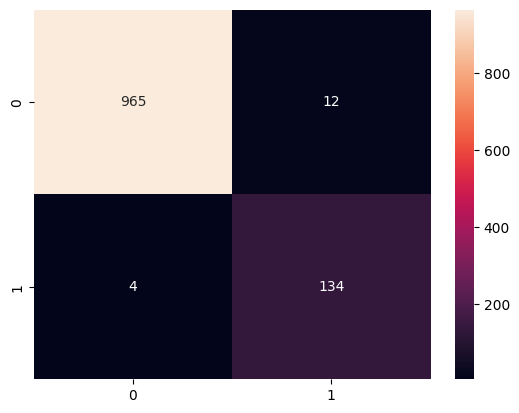

In [42]:
sns.heatmap(confusion_matrix(y_test,pred), annot=True, fmt='.0f')

**정확도**

$$\frac{정확한 예측 건수}{전체 경우의 수}$$

$$\frac{955+134}{955+132+12+4}\fallingdotseq98\% $$

**ERROR**

- `Type 1 Error(제1종 오류)`: 실제 음성인 것을 양성으로 예측하는 오류
- `Type 2 Error(제2종 오류)`: 실제 양성인 것을 음성으로 예측하는 오류

> 스팸 문자 예측에서는?

- `Type 1 Error`: 스팸이 아닌데 스팸으로 분류한 경우
- `Type 2 Error`: 스팸인데 스팸이 아니라고 분류한 경우

# 🌲 08장 결정 트리

> `결정 트리(Decision Tree)`: 관측값과 목푯값을 연결시켜주는 예측 모델

- 수많은 트리 기반 모델의 베이스 모델
- 각 변수의 특정 지점을 기준으로 데이터를 분류해가며 예측 모델을 만듦
- 예측력과 성능에서는 사용할 일이 없지만 **시각화** 가 매우 뛰어나다

**장점**
- Non-parametric
- outlier 영향 X
- tree graph -> 직관적 이해, 설명 가능

**단점**
- 트리가 무한정 깊어지면 overfitting 가능성 증가
- 발전된 트리 기반 모델에 비해 낮은 예측력

## 8.1 문제 정의: 한눈에 보는 예측 목표

**연봉(salary) 데이터셋**
- 목표: 연봉이 $50,000 이상/이하 예측
- 종속 변수: `class`
- 독립 변수: `학력`, `교육 연수`, `혼인 상태`, `직업` 등

## 8.2 라이브러리 및 데이터 불러오기, 데이터 확인하기

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/salary.csv'
data = pd.read_csv(file_url, skipinitialspace = True)

In [44]:
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [45]:
data['class'].unique()

array(['<=50K', '>50K'], dtype=object)

종속변수 `class`의 고윳값: `50K 이하`, `50K 초과`
> $50,000을 기준으로 나누어진 데이터

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   education       48842 non-null  object
 3   education-num   48842 non-null  int64 
 4   marital-status  48842 non-null  object
 5   occupation      46033 non-null  object
 6   relationship    48842 non-null  object
 7   race            48842 non-null  object
 8   sex             48842 non-null  object
 9   capital-gain    48842 non-null  int64 
 10  capital-loss    48842 non-null  int64 
 11  hours-per-week  48842 non-null  int64 
 12  native-country  47985 non-null  object
 13  class           48842 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


- 48842개의 로우, 14개의 컬럼
- 결측치 존재 컬럼: `workclass`, `occupation`, `native-country`

In [47]:
data.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,10.078089,1079.067626,87.502314,40.422382
std,13.710510,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [48]:
data.describe(include='all') # object type의 컬럼을 포함하여 요약 통계량을 출력

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
count,48842.000000,46043,48842,48842.000000,48842,46033,48842,48842,48842,48842.000000,48842.000000,48842.000000,47985,48842
unique,NaN,8,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33906,15784,NaN,22379,6172,19716,41762,32650,NaN,NaN,NaN,43832,37155
mean,38.643585,NaN,NaN,10.078089,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN,NaN
std,13.710510,NaN,NaN,2.570973,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN,NaN
min,17.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


## 8.3 전처리: 범주형 데이터
- 50K 이하 -> 0
- 50K 초과 -> 1

In [49]:
data['class'] = data['class'].map({'<=50K':0, '>50K':1})

### 8.3.1 object형의 변수 정보 확인하기

salary dataset의 독립변수는 13개여서 변수들의 타입을 쉽게 눈으로 확인할 수 있으나 변수가 100개 이상으로 많아지면 다른 접근법이 필요함

> 범주형 데이터가 얼마나 있는지 확인하는 방법을 알아보자

In [50]:
data['age'].dtype

dtype('int64')

In [51]:
for i in data.columns:
    print(i, data[i].dtype)

age int64
workclass object
education object
education-num int64
marital-status object
occupation object
relationship object
race object
sex object
capital-gain int64
capital-loss int64
hours-per-week int64
native-country object
class int64


In [53]:
# object형 변수 이름들을 obj_list로 모아보기

obj_list = []
for i in data.columns:
    if data[i].dtype == 'object':
        obj_list.append(i)

In [54]:
obj_list

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

### 8.3.2 전처리할 변수 선별하기

In [55]:
for i in obj_list:
    print(i, data[i].nunique())

workclass 8
education 16
marital-status 7
occupation 14
relationship 6
race 5
sex 2
native-country 41


In [56]:
# unique가 10개 이상인 변수들만 추려보기
for i in obj_list:
    if data[i].nunique() >= 10:
        print(i, data[i].nunique())

education 16
occupation 14
native-country 41


### 8.3.3 `education` 변수 처리
unique가 10개 이상인 변수들을 각기 다른 방법으로 처리하자

In [57]:
data['education'].value_counts()

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

미국의 교육 시스템에 대한 정보

- 초중고 1~12학년
- 학위 이름: bachelors, masters

> 서열화 가능

In [58]:
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,0


In [59]:
np.sort(data['education-num'].unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [61]:
data[data['education-num'] == 1]

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
779,64,Private,Preschool,1,Married-civ-spouse,Handlers-cleaners,Husband,Asian-Pac-Islander,Male,0,0,40,Philippines,0
818,21,Private,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,25,Mexico,0
1029,57,NaN,Preschool,1,Separated,NaN,Not-in-family,White,Male,0,0,40,United-States,0
1059,31,Private,Preschool,1,Never-married,Handlers-cleaners,Not-in-family,Amer-Indian-Eskimo,Male,0,0,25,United-States,0
1489,19,Private,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,36,Mexico,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48079,31,State-gov,Preschool,1,Never-married,Other-service,Not-in-family,White,Male,0,0,24,United-States,0
48316,40,Private,Preschool,1,Married-civ-spouse,Other-service,Husband,White,Male,0,1672,40,Mexico,0
48505,40,Private,Preschool,1,Never-married,Other-service,Not-in-family,White,Female,0,0,20,United-States,0
48640,46,Private,Preschool,1,Married-civ-spouse,Machine-op-inspct,Other-relative,Black,Male,0,0,75,Dominican-Republic,0


In [62]:
data[data['education-num'] == 1]['education'].unique()

array(['Preschool'], dtype=object)

> `education-num`이 1이면 모두 `Preschool`

In [63]:
for i in np.sort(data['education-num'].unique()):
    print(i, data[data['education-num'] == i]['education'].unique())

1 ['Preschool']
2 ['1st-4th']
3 ['5th-6th']
4 ['7th-8th']
5 ['9th']
6 ['10th']
7 ['11th']
8 ['12th']
9 ['HS-grad']
10 ['Some-college']
11 ['Assoc-voc']
12 ['Assoc-acdm']
13 ['Bachelors']
14 ['Masters']
15 ['Prof-school']
16 ['Doctorate']


이미 서열화된 숫자형 변수로 `education-num`이 있다

> `education` 대신 `education-num` 변수를 사용하자

In [64]:
data.drop('education', axis=1, inplace=True)

In [65]:
data.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,NaN,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,0


### 8.3.4 `occupation` 변수 처리

In [66]:
data['occupation'].value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

- 비슷한 직업군끼리는 묶여서 정리되어 있음
- 직업 간의 서열 존재하지 않음
- 이후에 더미 변수로 처리

### 8.3.5 `native-country` 변수 처리

In [67]:
data['native-country'].value_counts()

native-country
United-States                 43832
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Nicaragua                        49
Greece                           49
Peru                             46
Ecuador      

- US가 압도적으로 큰 비중을 차지
- US와 Others로 변경하면 데이터가 간소화되나 그만큼 정보의 손실이 발생함
- 또는 North America, South America, Asia와 같이 국가들을 묶기

**유사성**이 있는지 확인하자

In [80]:
data.groupby('native-country').mean()

TypeError: agg function failed [how->mean,dtype->object]

`TypeError: agg function failed [how->mean,dtype->object]`

> object type의 컬럼에 대해서는 연산이 불가능함

> `numeric_only=True`로 설정해 주기

In [81]:
data.groupby('native-country').mean(numeric_only=True).sort_values('class')

,age,education-num,capital-gain,capital-loss,hours-per-week,class
native-country,,,,,,
Holand-Netherlands,32.000000,10.000000,0.000000,2205.000000,40.000000,0.000000
Guatemala,32.090909,6.306818,167.875000,18.113636,38.715909,0.034091
Outlying-US(Guam-USVI-etc),38.826087,10.043478,0.000000,76.608696,41.347826,0.043478
Columbia,39.458824,9.258824,125.364706,65.247059,39.929412,0.047059
Dominican-Republic,37.970874,7.320388,1064.456311,39.029126,41.621359,0.048544
Mexico,33.635121,6.026288,415.954784,32.656151,40.213460,0.049422
Nicaragua,36.285714,9.000000,138.653061,69.938776,36.938776,0.061224
El-Salvador,33.380645,6.722581,392.761290,36.367742,36.361290,0.070968
Trinadad&Tobago,39.259259,8.962963,116.185185,156.518519,38.888889,0.074074


1. US class의 평균값: 약 0.24
    - 다른 국가들은 US의 평균값보다 크거나 작아서 전혀 비슷하지 않음
    - Others로 묶지 말자
2. 지역별로 묶는다면
    - class 평균이 가장 높은 France 중심으로 유럽 국가 찾아보자
    - 극단적으로 다른 경우: Holand, Portual - 관측치 1개, 평균 0.18
    - 적합하지 않다
3. 더미 변수 대신 각 국가명마다 라벨링한다면
    - 트리 기반의 모델에서는 연속된 숫자들을 일정 구간 나누어 받아들이기 때문에 트리가 충분히 깊어지면 범주형 변수를 숫자로 바꿔도 큰 문제 없음
    - 라벨링
    - `value_counts()`로 확인한 숫자들을 부여
    - **`groupby()`로 확인한 class의 평균값** -> overfitting 문제 발생 가능

In [83]:
country_group = data.groupby('native-country').mean(numeric_only=True)['class']

In [84]:
# merge()를 사용해 데이터 합치기

country_group = country_group.reset_index() # 인덱스를 변수로 불러냄
country_group

,native-country,class
0,Cambodia,0.321429
1,Canada,0.346154
2,China,0.295082
3,Columbia,0.047059
4,Cuba,0.246377
5,Dominican-Republic,0.048544
6,Ecuador,0.133333
7,El-Salvador,0.070968
8,England,0.370079
9,France,0.421053


In [85]:
data = data.merge(country_group, on='native-country', how='left')
# data와 country_group을 native-country를 기준으로 결합

In [86]:
data

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class_x,class_y
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0,0.243977
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0,0.243977
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1,0.243977
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1,0.243977
4,18,NaN,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,0,0.243977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0,0.243977
48838,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1,0.243977
48839,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0,0.243977
48840,22,Private,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0,0.243977


`class_x`, `class_y` 변수가 자동으로 생성됨

> `class_y`를 국가명 대신 사용
- `native-country` 삭제
- `class_y`를 `native-country`fh qusrud
- `class_x`를 `class`로 변경

In [87]:
data.drop('native-country', axis=1, inplace=True)
data = data.rename(columns= {'class_x': 'class', 'class_y': 'native-country'})

In [88]:
data

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,class,native-country
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,0,0.243977
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,0,0.243977
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,1,0.243977
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,1,0.243977
4,18,NaN,10,Never-married,NaN,Own-child,White,Female,0,0,30,0,0.243977
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,0,0.243977
48838,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,1,0.243977
48839,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,0,0.243977
48840,22,Private,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,0,0.243977


## 8.4 전처리: 결측치 처리 및 더미 변수 변환

In [89]:
data.isna().mean()

age               0.000000
workclass         0.057307
education-num     0.000000
marital-status    0.000000
occupation        0.057512
relationship      0.000000
race              0.000000
sex               0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
class             0.000000
native-country    0.017546
dtype: float64

결측치 변수: `workclass`, `occupation`, `native-country`
- `native-country`: 앞에서 각 국가별 class의 평균값으로 대체한 상태
    - `-99`로 변경
- `workclass`, `occupation`: 범주형 변수이므로 데이터를 확인해 본 후 처리해야 함

In [90]:
data['native-country'] = data['native-country'].fillna(-99)

In [91]:
data['workclass'].value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

`Private` 비율이 압도적
> 연습 차원에서 `Private`으로 결측치 대체

In [92]:
data['workclass'] = data['workclass'].fillna('Private')

In [93]:
data['occupation'].value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

어느 특정값이 많다고 하기 어렵다 -> `Unknown`으로 대체

In [94]:
data['occupation'] = data['occupation'].fillna('Unknown')

In [95]:
data = pd.get_dummies(data, drop_first=True)

In [97]:
data.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,class,native-country,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male
0,25,7,0,0,40,0,0.243977,False,False,True,...,False,False,True,False,False,False,True,False,False,True
1,38,9,0,0,50,0,0.243977,False,False,True,...,False,False,False,False,False,False,False,False,True,True
2,28,12,0,0,40,1,0.243977,True,False,False,...,False,False,False,False,False,False,False,False,True,True
3,44,10,7688,0,40,1,0.243977,False,False,True,...,False,False,False,False,False,False,True,False,False,True
4,18,10,0,0,30,0,0.243977,False,False,True,...,False,False,True,False,False,False,False,False,True,False


## 8.5 모델링 및 평가하기

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop('class', axis=1), data['class'], test_size = 0.4, random_state = 100)

데이터가 비교적 크다 -> 6:4의 비율로 split

`Decision Tree`
- 회귀(연속형 변수): `DecisionTreeRegressor`
- 분류(범주형 변수): `DecisionTreeClassifier`

> 8장에서는 분류 문제이므로 classifier 사용

In [99]:
from sklearn.tree import DecisionTreeClassifier

In [100]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [101]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.8159389875620617

## 8.8 매개변수 튜닝
- 트리가 깊어질수록(수없이 많은 노드를 분류하여 모델을 만들수록) 오버피팅 발생 가능성이 높다
- `max_depth`: 트리의 깊이를 제한하는 매개변수 (default = None)

In [102]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)
print('Train score:', accuracy_score(y_train, train_pred), 'Test score:', accuracy_score(y_test, test_pred))

Train score: 0.9780242279474493 Test score: 0.8149152889389364


train score는 0.98인 반면 test score는 0.81

> 훈련셋에서는 정확도가 매우 높지만 테스트셋에서는 상대적으로 낮다

> 오버피팅이 발생함

In [103]:
model = DecisionTreeClassifier(max_depth=5)
model.fit(X_train, y_train)
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)
print('Train score:', accuracy_score(y_train, train_pred), 'Test score:', accuracy_score(y_test, test_pred))

Train score: 0.8540180856509129 Test score: 0.8499769667809797


In [104]:
model = DecisionTreeClassifier(max_depth=7)
model.fit(X_train, y_train)
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)
print('Train score:', accuracy_score(y_train, train_pred), 'Test score:', accuracy_score(y_test, test_pred))

Train score: 0.8598532673605187 Test score: 0.8542253160669498


`max_depth`의 값에 따라 정확도가 조금씩 달라진다

## 8.9 트리 그래프

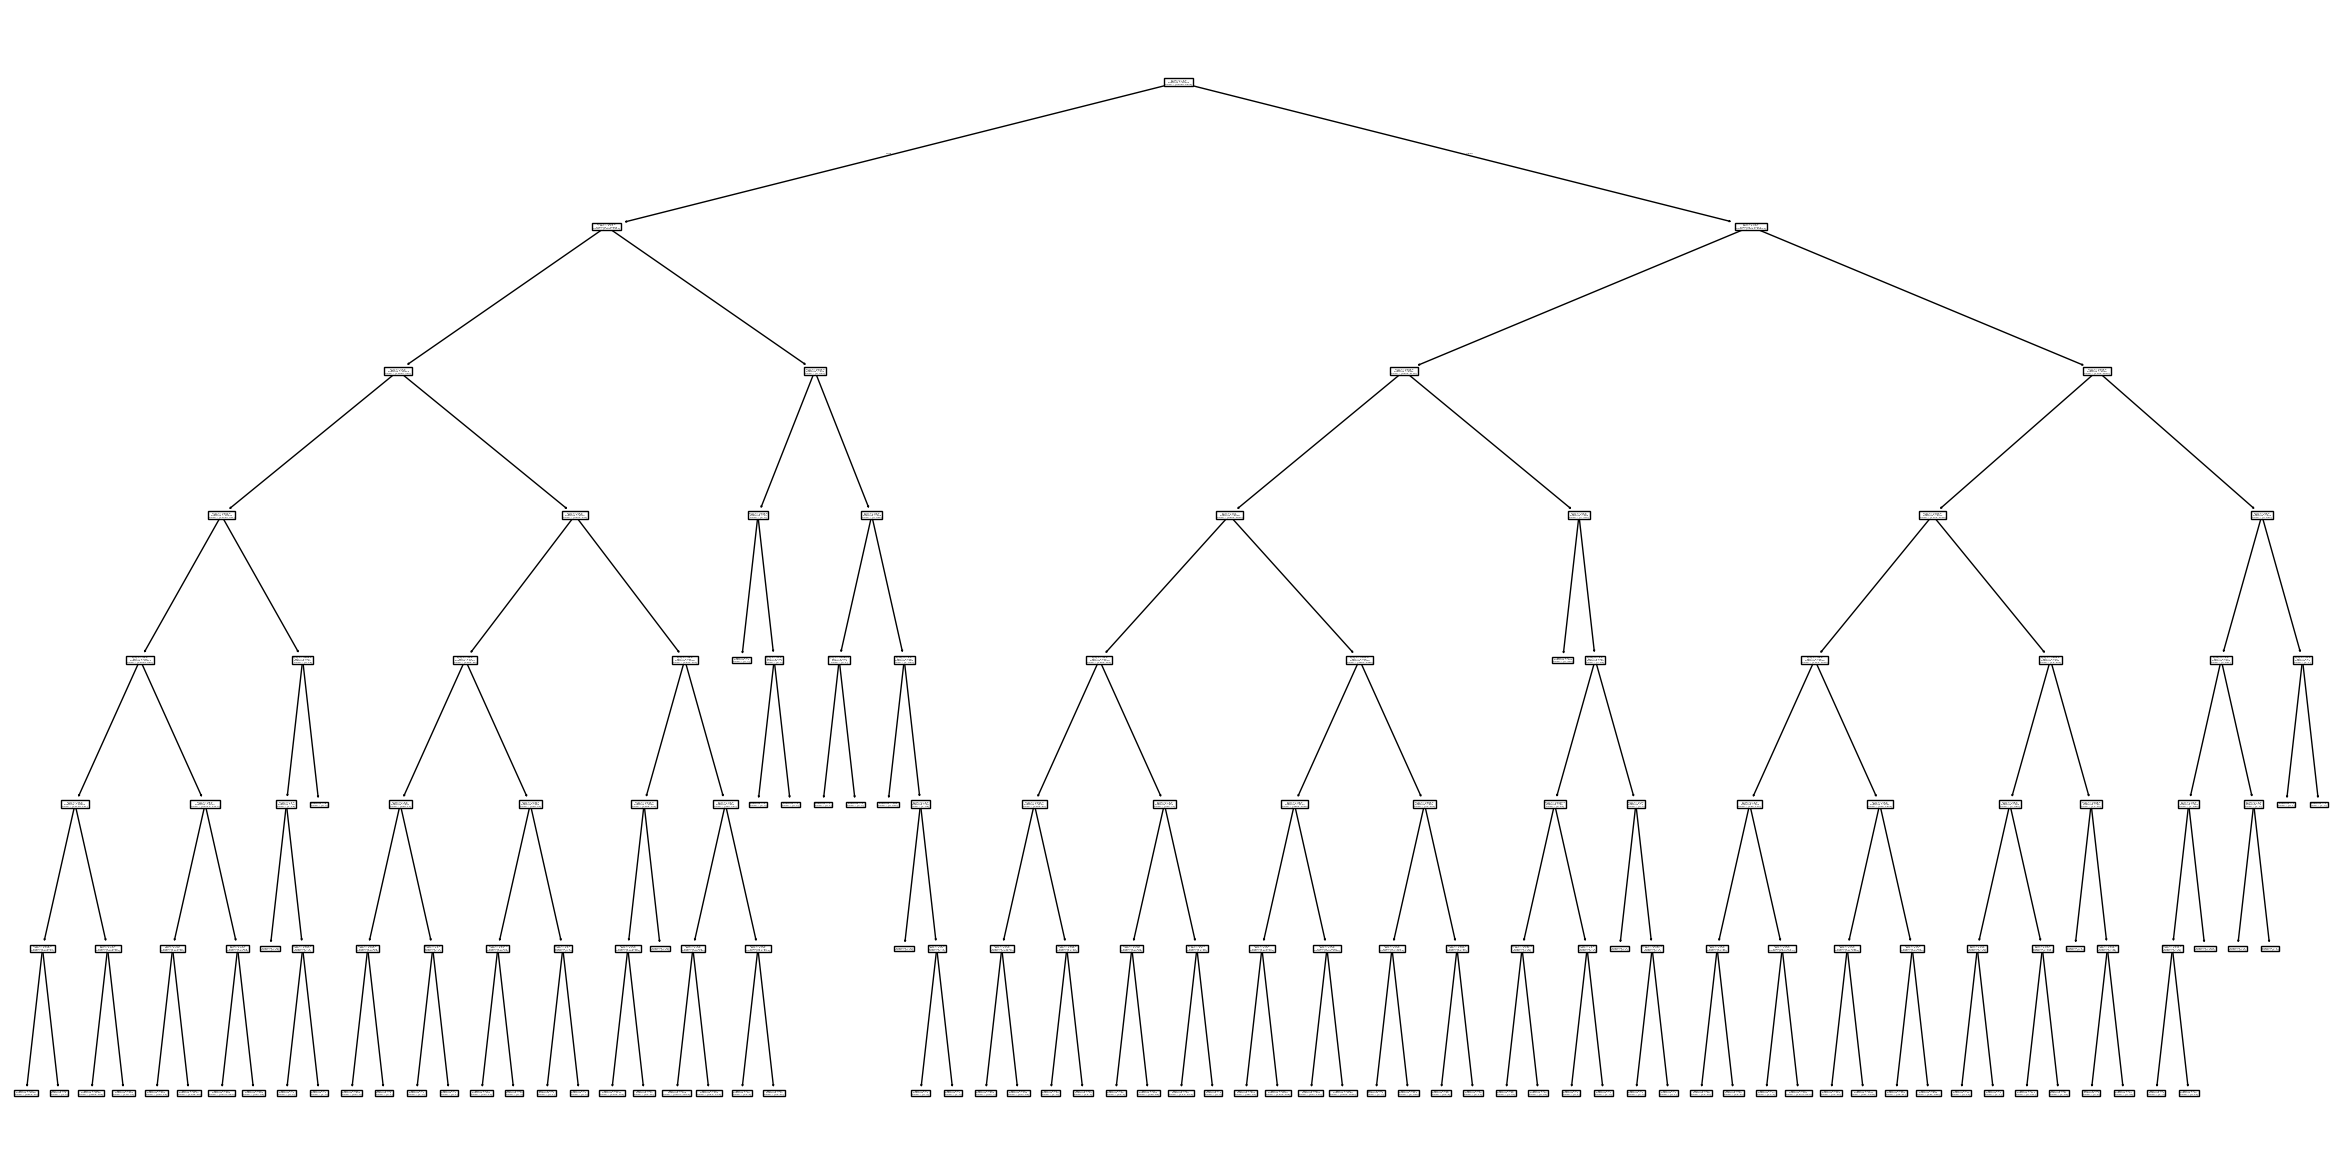

In [105]:
from sklearn.tree import plot_tree
plt.figure(figsize=(30,15))
plot_tree(model)
plt.show()

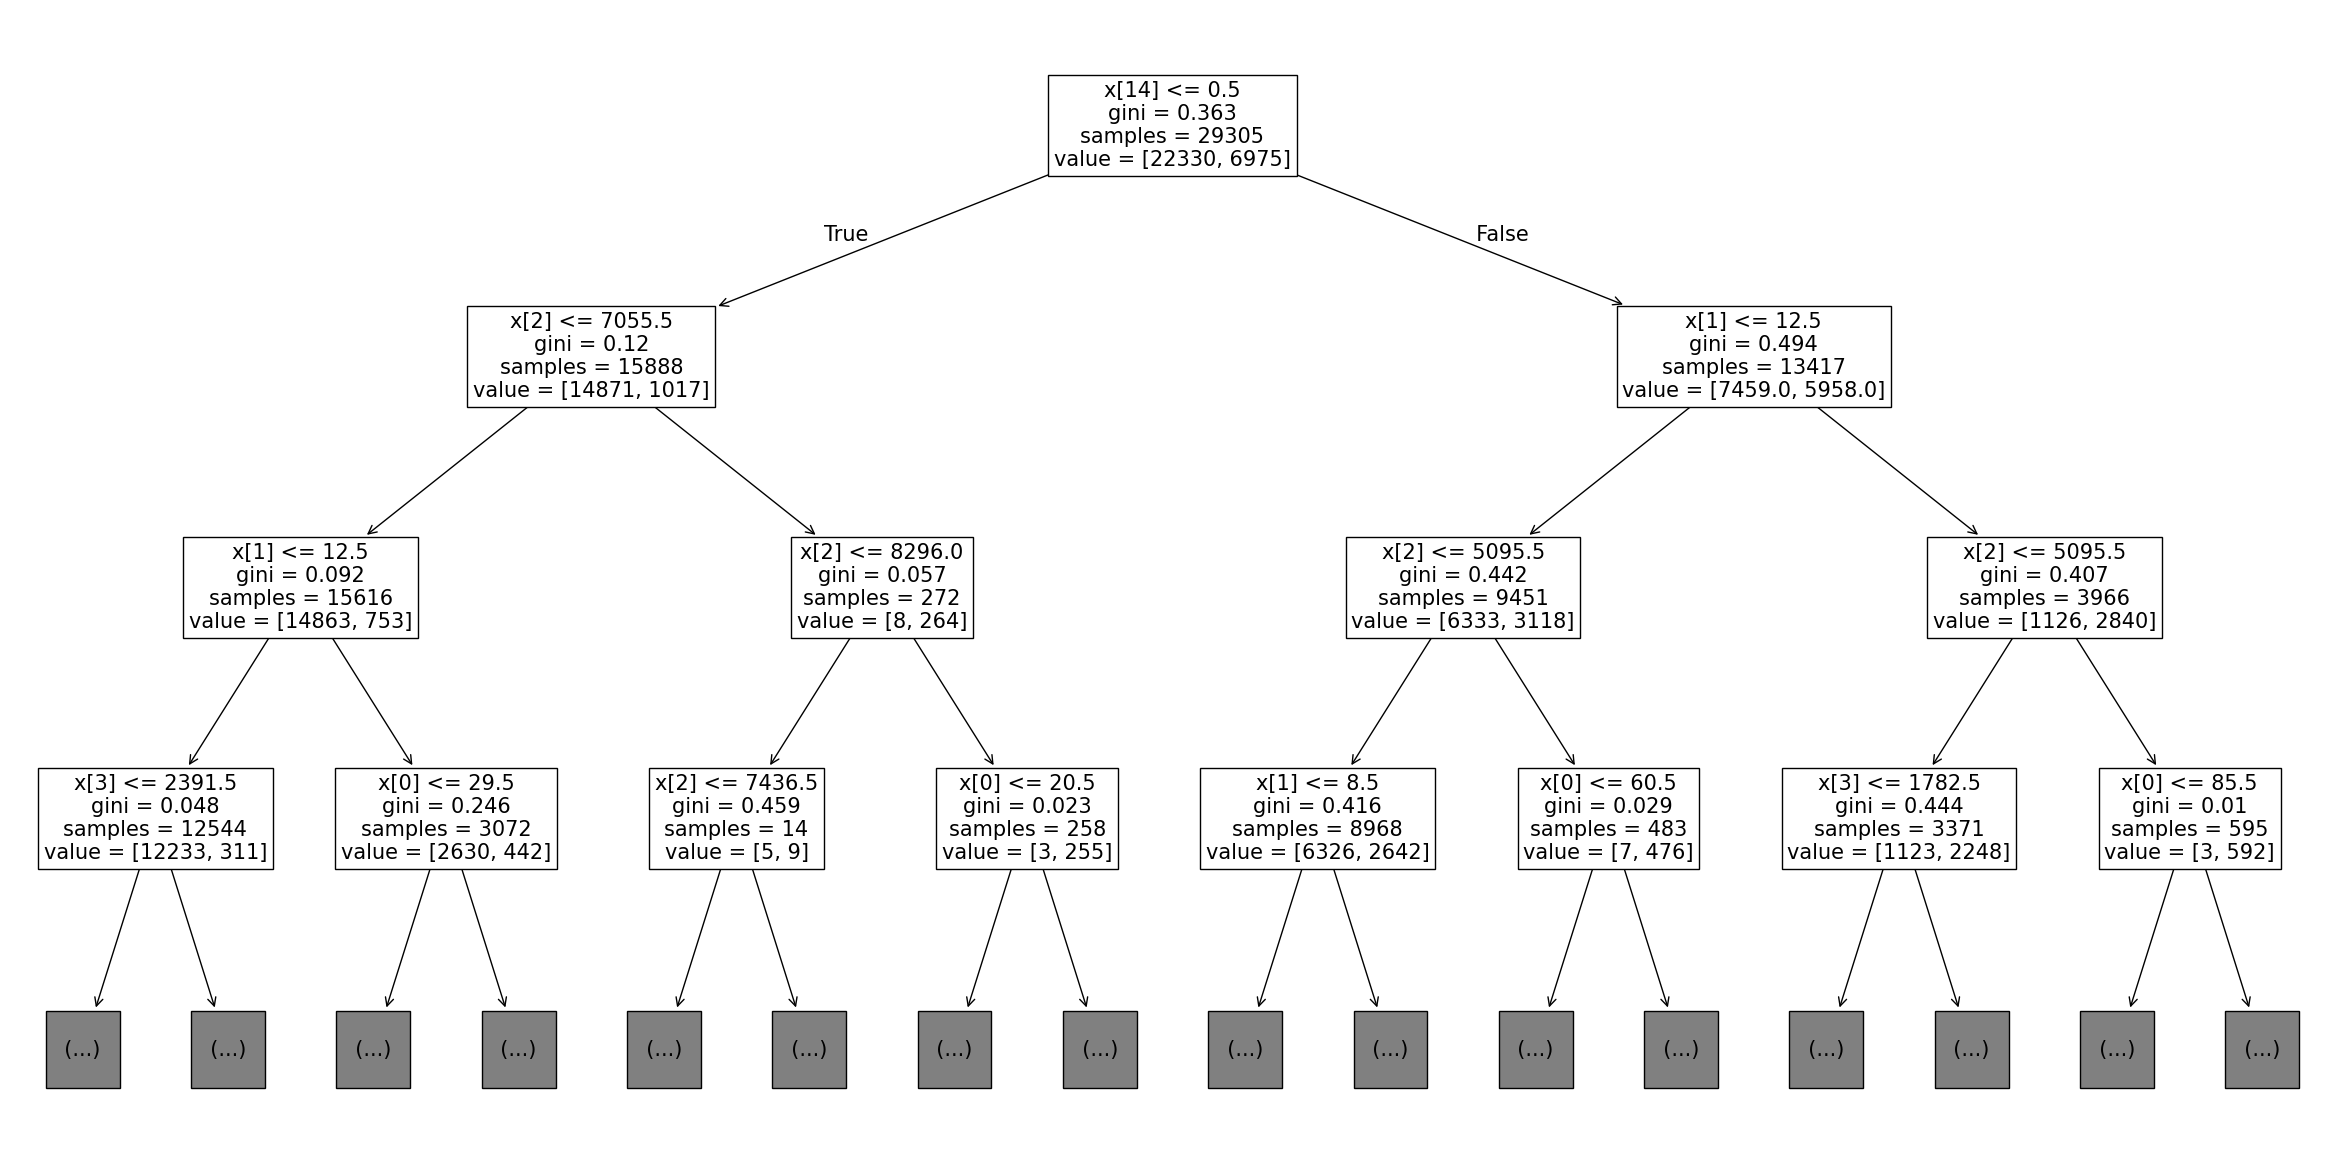

In [106]:
plt.figure(figsize=(30,15))
plot_tree(model, max_depth = 3, fontsize=15) # 3단계까지만 확대해서 보기
plt.show()

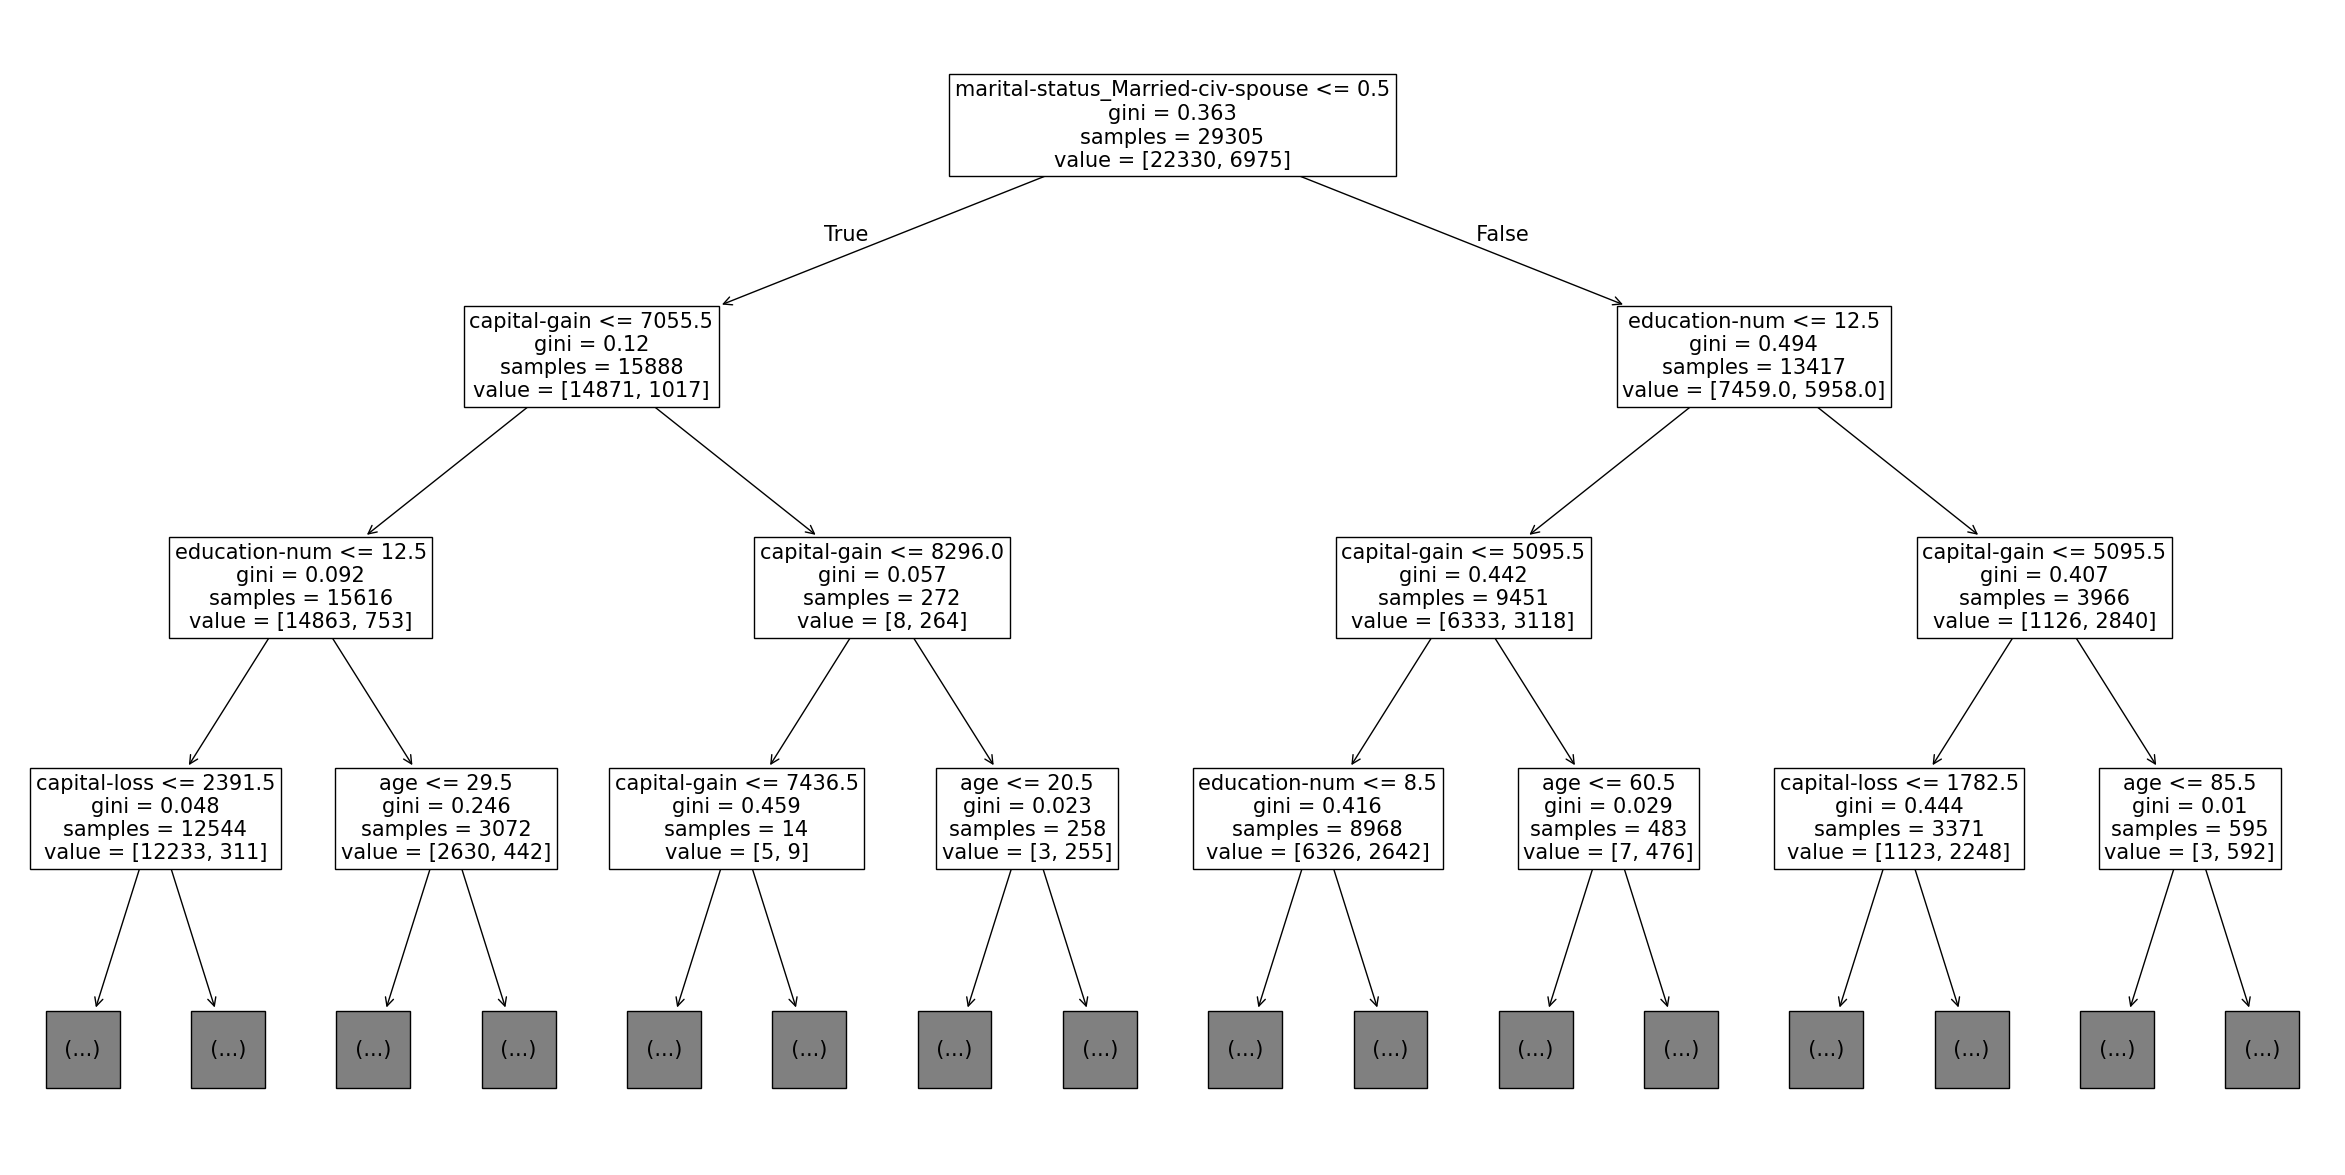

In [ ]:
# 변수 이름을 추가해서 그래프를 다시 출력하자
plt.figure(figsize=(30,15))
plot_tree(model, max_depth = 3, fontsize=15, feature_names=X_train.columns)
plt.show()

# 🌳 09장 랜덤 포레스트

**랜덤 포레스트(Random Forest)**
- 랜덤으로 생성된 무수히 많은 트리를 이용해서 예측
- overfitting 문제 완화
- 앙상블 기법: 여러 모델을 활용하여 하나의 모델을 이룸
- 부스팅 모델을 이해하기 위해 꼭 알아야 할 필수 알고리즘

**장점**
- outlier 영향 X
- 선형/비선형 데이터 상관없이 작동

**단점**
- 학습 속도가 상대적으로 느림
- 낮은 해석력

## 9.1 문제 정의: 한눈에 보는 예측 목표

> **중고차 거래 데이터셋**
- 중고차 가격 예측 문제 (회귀)
- 종속변수: 판매 가격
- 독립변수: 생산년도, 주행거리, 변속기, 마일리지, 배기량 등

## 9.2 라이브러리 및 데이터 불러오기, 데이터 확인하기

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/car.csv'
data = pd.read_csv(file_url)

In [109]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


- 8128개의 로우, 13개의 컬럼
- 결측치 존재 컬럼: `mileage`, `engine`, `max_power`, `torque`, `seats`
- `engine`: 숫자형 데이터여야 처리가 쉬운데, 뒤에 'cc'가 붙어서 문자형 타입임

In [111]:
round(data.describe(),2)

,year,selling_price,km_driven,seats
count,8128.00,8128.00,8128.00,7907.00
mean,2013.80,638271.81,69819.51,5.42
std,4.04,806253.40,56550.55,0.96
min,1983.00,29999.00,1.00,2.00
25%,2011.00,254999.00,35000.00,5.00
50%,2015.00,450000.00,60000.00,5.00
75%,2017.00,675000.00,98000.00,5.00
max,2020.00,10000000.00,2360457.00,14.00


**Outlier**
- `selling_price`: max가 유독 높음
- `km_driven`: min, max

> *선형 모델은 이상치에 대한 처리가 필요하지만 9장에서는 트리 모델을 사용하므로 이상치를 별도로 처리하지 않을 것*

## 9.3 전처리: 텍스트 데이터
- obj -> int/float
    - 단위 통일
- 텍스트 분류: 불필요하게 구체적인 내용은 버리고 *필요한 부분* 만 남김

숫자형 데이터로 변경할 컬럼: `mileage`, `engine`, `max_power`, `torgue` 숫자+문자
- 숫자와 분자 분리
- 숫자의 자료형을 float으로 지정

### 9.3.1 `engine` 변수 전처리하기

In [112]:
data['engine'].str.split(expand=True)

,0,1
0,1248,CC
1,1498,CC
2,1497,CC
3,1396,CC
4,1298,CC
...,...,...
8123,1197,CC
8124,1493,CC
8125,1248,CC
8126,1396,CC


In [113]:
data[['engine','engine_unit']]= data['engine'].str.split(expand=True)

In [114]:
data['engine'].head()

0    1248
1    1498
2    1497
3    1396
4    1298
Name: engine, dtype: object

`dtype: object`
> 숫자만 남아 있지만 아직 문자형

In [115]:
data['engine'] = data['engine'].astype('float32')

In [116]:
data['engine'].head()

0    1248.0
1    1498.0
2    1497.0
3    1396.0
4    1298.0
Name: engine, dtype: float32

In [117]:
data['engine_unit'].unique()

array(['CC', nan], dtype=object)

In [118]:
data.drop('engine_unit', axis=1, inplace=True)
# engine_unit 에 CC만 있음 -> 제거

### 9.3.2 `max_power` 변수 전처리하기

In [119]:
data[['max_power','max_power_unit']] = data['max_power'].str.split(expand=True)

In [120]:
data['max_power'].head()

0        74
1    103.52
2        78
3        90
4      88.2
Name: max_power, dtype: object

In [121]:
data['max_power'] = data['max_power'].astype('float32')

ValueError: could not convert string to float: 'bhp'

`ValueError: could not convert string to float: 'bhp'`
> string -> float 변환이 안 된다

*max_power* 에 'bhp' 라는 문자가 있는지 확인해 보자

In [122]:
data[data['max_power'] == 'bhp']

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_power_unit
4933,Maruti Omni CNG,2000,80000,100000,CNG,Individual,Manual,Second Owner,10.9 km/kg,796.0,bhp,NaN,8.0,None


> 원래 데이터에 숫자 없이 bhp만 있어서 `str.split()`에서 빈칸을 기준으로 분리할 때 분리되지 않은 채로 남음

한 건이니까 라인을 제거하거나 해당 값을 Null로 변환

> 잘못된 데이터가 여러 건 있을 때를 대비하여 `Try and Except` 블록을 사용해서 처리

In [ ]:
def isFloat(value):
  try:
    float(value)
    return float(value)
  except ValueError:
    return np.NaN

In [124]:
data['max_power'] = data['max_power'].apply(isFloat)
# isFloat 함수를 사용하여 숫자형 변수로 변환

AttributeError: `np.NaN` was removed in the NumPy 2.0 release. Use `np.nan` instead.

AttributeError: `np.NaN` was removed in the NumPy 2.0 release. Use `np.nan` instead.

> 넘파이 버전 차이인 듯? isFloat() 함수에서 `np.NaN`을 `np.nan`으로 바꿔서 다시 해 보자

In [125]:
def isFloat(value):
  try:
    float(value)
    return float(value)
  except ValueError:
    return np.nan

In [126]:
data['max_power'] = data['max_power'].apply(isFloat)
# isFloat 함수를 사용하여 숫자형 변수로 변환

In [127]:
data['max_power_unit'].unique()

array(['bhp', nan, None], dtype=object)

In [128]:
data.drop('max_power_unit', axis=1, inplace=True)
# 아예 제거하자

### 9.3.3 `mileage` 변수 전처리하기

In [129]:
data[['mileage','mileage_unit']] = data['mileage'].str.split(expand=True)
# 분할된 문자들을 새로운 변수들로 저장

In [130]:
data['mileage'] = data['mileage'].astype('float32')

In [131]:
data['mileage_unit'].unique()

array(['kmpl', 'km/kg', nan], dtype=object)

**단위를 이해하고 숫자를 변환해야 함**
- `kmpl = km/l` : 리터당 킬로미터
- `km/kg` : 킬로그램당 킬로미터
- 킬로미터: 주행거리
- 리터, 킬로그램: 연료에 대한 측정 단위
    - 휘발유/디젤 - 리터 단위
    - LGP/CNG - 킬로그램 단위

> `fuel`: 연료를 명시한 컬럼으로 해결해 보자

In [132]:
data['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [133]:
def mile(x):
    if x['fuel'] == 'Petrol':
        return x['mileage'] / 80.43
    elif x['fuel'] == 'Diesel':
        return x['mileage'] / 73.56
    elif x['fuel'] == 'LPG':
        return x['mileage'] / 40.85
    else: 
        return x['mileage'] / 44.23

다즌 종류의 연료로 주행거리를 비교하기 위해 **연료의 가격** 을 활용하자

> 1달러당 몇 km를 주행했는지에 따라 `mileage`를 1달러당 주행거리로 변경

In [134]:
data['mileage'] = data.apply(mile, axis=1)

In [135]:
data.drop('mileage_unit', axis=1, inplace=True)

In [136]:
data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,0.318108,1248.0,74.00,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,0.287384,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,0.220067,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,0.312670,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,0.200174,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,0.230014,1197.0,82.85,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,0.228385,1493.0,110.00,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,0.262371,1248.0,73.90,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,0.320419,1396.0,70.00,140Nm@ 1800-3000rpm,5.0


### 9.3.4 `torque` 변수 전처리하기

In [137]:
data['torque'].head()

0              190Nm@ 2000rpm
1         250Nm@ 1500-2500rpm
2       12.7@ 2,700(kgm@ rpm)
3    22.4 kgm at 1750-2750rpm
4       11.5@ 4,500(kgm@ rpm)
Name: torque, dtype: object

- @ 단위는 공통적으로 `rpm`이 있고, 그 앞에 `Nm/kgm`이 있음
- `rpm`: 어떤 데이터는 특정값, 어떤 경우에는 범위로 들어 있어서 `nm/kgm`만 다루어 볼 것

> `string`으로 다루어 보자

In [ ]:
data['torque'] = data['torque'].str.upper() # 모두 대문자로 변환

In [139]:
def torque_unit(x):
    if 'NM' in str(x):
        return 'Nm'
    elif 'KGM' in str(x):
        return 'kgm'

In [140]:
data['torque_unit'] = data['torque'].apply(torque_unit)
# torque 변수를 torque_unit 함수에 적용하여 torque_unit이라는 변수로 저장

In [141]:
data['torque_unit'].unique()

array(['Nm', 'kgm', None], dtype=object)

In [143]:
data['torque_unit'].isna()
data[data['torque_unit'].isna()]
data[data['torque_unit'].isna()]['torque'].unique()

array([nan, '250@ 1250-5000RPM', '510@ 1600-2400', '110(11.2)@ 4800',
       '210 / 1900'], dtype=object)

1. `torque_unit`이 Null값인지 확인
2. `data[]` 안에 넣어 필터링
3. 필터링된 데이터에서 `torque`의 unique 값 확인

In [144]:
data['torque_unit'].fillna('Nm', inplace= True)

`torque` 변수에서 맨 앞 숫자 부분을 빼내자

In [147]:
string_example = '12.7@ 2,700(KGM@ RPM)'

In [148]:
string_example[:4]

'12.7'

In [151]:
for i, j in enumerate(string_example):
    print(i,'번째 텍스트: ',j)

0 번째 텍스트:  1
1 번째 텍스트:  2
2 번째 텍스트:  .
3 번째 텍스트:  7
4 번째 텍스트:  @
5 번째 텍스트:   
6 번째 텍스트:  2
7 번째 텍스트:  ,
8 번째 텍스트:  7
9 번째 텍스트:  0
10 번째 텍스트:  0
11 번째 텍스트:  (
12 번째 텍스트:  K
13 번째 텍스트:  G
14 번째 텍스트:  M
15 번째 텍스트:  @
16 번째 텍스트:   
17 번째 텍스트:  R
18 번째 텍스트:  P
19 번째 텍스트:  M
20 번째 텍스트:  )


In [ ]:
for i,j in enumerate(string_example):
    if j not in '0123456789.':
        cut = i
        break

In [ ]:
def split_num(x):
    x = str(x) # 문자형으로 변환
    for i,j in enumerate(x):
        if j not in '0123456789.':
            cut = i
            break
    return x[:cut] # cut 이전 자리까지 인덱싱하여 리턴

In [154]:
data['torque'] = data['torque'].apply(split_num)
# torque 변수를 split_num 함수에 적용

In [155]:
data['torque']

0         190
1         250
2        12.7
3        22.4
4        11.5
        ...  
8123    113.7
8124       24
8125      190
8126      140
8127      140
Name: torque, Length: 8128, dtype: object

In [156]:
data['torque'] = data['torque'].astype('float64')

ValueError: could not convert string to float: ''

`ValueError: could not convert string to float: ''`

> 비어 있는 string값이 있다 -> Null로 대체한 뒤 진행

In [158]:
data['torque'] = data['torque'].replace('', np.nan)

In [159]:
data['torque'] = data['torque'].astype('float64')

In [160]:
data['torque'].head()

0    190.0
1    250.0
2     12.7
3     22.4
4     11.5
Name: torque, dtype: float64

**단위에 따른 차이를 맞춰주는 변환**

- Nm/kgm: 중력과 관련된 것
    - $\text{kgm} \times 9.8066=\text{Nm}$

> Nm이면 그대로 반환하여 모든 값을 Nm으로 변환하는 함수 정의

In [161]:
def torque_trans(x):
    if x['torque_unit'] == 'kgm':
        return x['torque'] * 9.8066
    else:
        return x['torque']

In [162]:
data['torque'] = data.apply(torque_trans, axis=1)

In [163]:
data.drop('torque_unit', axis=1, inplace=True)

In [164]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,0.318108,1248.0,74.00,190.00000,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,0.287384,1498.0,103.52,250.00000,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,0.220067,1497.0,78.00,124.54382,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,0.312670,1396.0,90.00,219.66784,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,0.200174,1298.0,88.20,112.77590,5.0


### 9.3.5 `name` 변수 전처리하기

`name`: 자동차의 브랜드/모델명이 기입된 변수

> 브랜드명만 분리

In [165]:
data['name'] = data['name'].str.split(expand=True)[0]

In [166]:
data['name'].unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Fiat', 'Datsun', 'Jeep',
       'Mercedes-Benz', 'Mitsubishi', 'Audi', 'Volkswagen', 'BMW',
       'Nissan', 'Lexus', 'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo',
       'Kia', 'Force', 'Ambassador', 'Ashok', 'Isuzu', 'Opel', 'Peugeot'],
      dtype=object)

띄어쓰기로 인해 `Land Rover`가 `Land`로 저장됨 -> `Land Rover`로 변경

In [167]:
data['name'] = data['name'].replace('Land', 'Land Rover')

In [168]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,0.318108,1248.0,74.00,190.00000,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,0.287384,1498.0,103.52,250.00000,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,0.220067,1497.0,78.00,124.54382,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,0.312670,1396.0,90.00,219.66784,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,0.200174,1298.0,88.20,112.77590,5.0


## 9.4 전처리: 결측치 처리와 더미 변수 변환

In [169]:
data.isna().mean()

name             0.000000
year             0.000000
selling_price    0.000000
km_driven        0.000000
fuel             0.000000
seller_type      0.000000
transmission     0.000000
owner            0.000000
mileage          0.027190
engine           0.027190
max_power        0.026575
torque           0.027313
seats            0.027190
dtype: float64

`mileage`이하 변수들에 모두 결측치 존재
- 모두 자동차의 스펙과 관련된 변수
- 모든 값을 평균으로 치환해 버리면 노이즈가 될 수 있음

> 과감하게 해당 행을 모두 제거하자

In [170]:
data.dropna(inplace=True)
len(data)

7906

In [171]:
data = pd.get_dummies(data, columns = ['name','fuel','seller_type','transmission','owner'], drop_first=True)

In [172]:
data.head()

,year,selling_price,km_driven,mileage,engine,max_power,torque,seats,name_Ashok,name_Audi,...,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2014,450000,145500,0.318108,1248.0,74.00,190.00000,5.0,False,False,...,True,False,False,True,False,True,False,False,False,False
1,2014,370000,120000,0.287384,1498.0,103.52,250.00000,5.0,False,False,...,True,False,False,True,False,True,False,True,False,False
2,2006,158000,140000,0.220067,1497.0,78.00,124.54382,5.0,False,False,...,False,False,True,True,False,True,False,False,False,True
3,2010,225000,127000,0.312670,1396.0,90.00,219.66784,5.0,False,False,...,True,False,False,True,False,True,False,False,False,False
4,2007,130000,120000,0.200174,1298.0,88.20,112.77590,5.0,False,False,...,False,False,True,True,False,True,False,False,False,False


## 9.5 모델링 및 평가하기

In [173]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop('selling_price', axis=1), data['selling_price'], test_size=0.2, random_state=100)

In [174]:
from sklearn.ensemble import RandomForestRegressor

In [176]:
model = RandomForestRegressor(random_state=100)
model.fit(X_train, y_train)
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

In [177]:
from sklearn.metrics import mean_squared_error
print("train_rmse:", mean_squared_error(y_train, train_pred) ** 0.5, "test_rmse:", mean_squared_error(y_test, test_pred) ** 0.5)

train_rmse: 53531.41548125947 test_rmse: 131855.18391308116


## 9.6 이해하기: K-폴드 교차검증

**K-fold Cross-Validation**
- 목적: 모델의 예측력을 더 안정적으로 평가하기 위함
- 아이디어: 데이터를 특정 개수(k)로 갠 후 하나씩 선택하여 테스트셋으로 사용 -> k번 반복

In [ ]:
from sklearn.model_selection import KFold

In [179]:
data

,year,selling_price,km_driven,mileage,engine,max_power,torque,seats,name_Ashok,name_Audi,...,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2014,450000,145500,0.318108,1248.0,74.00,190.00000,5.0,False,False,...,True,False,False,True,False,True,False,False,False,False
1,2014,370000,120000,0.287384,1498.0,103.52,250.00000,5.0,False,False,...,True,False,False,True,False,True,False,True,False,False
2,2006,158000,140000,0.220067,1497.0,78.00,124.54382,5.0,False,False,...,False,False,True,True,False,True,False,False,False,True
3,2010,225000,127000,0.312670,1396.0,90.00,219.66784,5.0,False,False,...,True,False,False,True,False,True,False,False,False,False
4,2007,130000,120000,0.200174,1298.0,88.20,112.77590,5.0,False,False,...,False,False,True,True,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,0.230014,1197.0,82.85,113.70000,5.0,False,False,...,False,False,True,True,False,True,False,False,False,False
8124,2007,135000,119000,0.228385,1493.0,110.00,235.35840,5.0,False,False,...,True,False,False,True,False,True,True,False,False,False
8125,2009,382000,120000,0.262371,1248.0,73.90,190.00000,5.0,False,False,...,True,False,False,True,False,True,False,False,False,False
8126,2013,290000,25000,0.320419,1396.0,70.00,140.00000,5.0,False,False,...,True,False,False,True,False,True,False,False,False,False


인덱스가 0부터 8127까지 있지만 실제로는 결측치를 처리하여 7906줄만 남아 있음

> KFold는 *인덱스 값* 을 사용하여 데이터를 분할하므로 빈값이 존재하면 에러가 발생함

> 인덱스를 정리하자

In [180]:
data.reset_index(drop=True, inplace=True)

In [181]:
data

,year,selling_price,km_driven,mileage,engine,max_power,torque,seats,name_Ashok,name_Audi,...,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2014,450000,145500,0.318108,1248.0,74.00,190.00000,5.0,False,False,...,True,False,False,True,False,True,False,False,False,False
1,2014,370000,120000,0.287384,1498.0,103.52,250.00000,5.0,False,False,...,True,False,False,True,False,True,False,True,False,False
2,2006,158000,140000,0.220067,1497.0,78.00,124.54382,5.0,False,False,...,False,False,True,True,False,True,False,False,False,True
3,2010,225000,127000,0.312670,1396.0,90.00,219.66784,5.0,False,False,...,True,False,False,True,False,True,False,False,False,False
4,2007,130000,120000,0.200174,1298.0,88.20,112.77590,5.0,False,False,...,False,False,True,True,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7901,2013,320000,110000,0.230014,1197.0,82.85,113.70000,5.0,False,False,...,False,False,True,True,False,True,False,False,False,False
7902,2007,135000,119000,0.228385,1493.0,110.00,235.35840,5.0,False,False,...,True,False,False,True,False,True,True,False,False,False
7903,2009,382000,120000,0.262371,1248.0,73.90,190.00000,5.0,False,False,...,True,False,False,True,False,True,False,False,False,False
7904,2013,290000,25000,0.320419,1396.0,70.00,140.00000,5.0,False,False,...,True,False,False,True,False,True,False,False,False,False


In [182]:
kf = KFold(n_splits=5)

In [183]:
X = data.drop('selling_price', axis=1)
y = data['selling_price']

In [184]:
for i, j in kf.split(X):
    print(i, j)

[1582 1583 1584 ... 7903 7904 7905] [   0    1    2 ... 1579 1580 1581]
[   0    1    2 ... 7903 7904 7905] [1582 1583 1584 ... 3160 3161 3162]
[   0    1    2 ... 7903 7904 7905] [3163 3164 3165 ... 4741 4742 4743]
[   0    1    2 ... 7903 7904 7905] [4744 4745 4746 ... 6322 6323 6324]
[   0    1    2 ... 6322 6323 6324] [6325 6326 6327 ... 7903 7904 7905]


In [ ]:
for train_index, test_index in kf.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [186]:
train_rmse_total = []
test_rmse_total = []

In [187]:
for train_index , test_index in kf.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index] , y[test_index]

    model = RandomForestRegressor(random_state=100)  
    model.fit(X_train,y_train)
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
     
    train_rmse = mean_squared_error(y_train, train_pred) ** 0.5
    test_rmse = mean_squared_error(y_test, test_pred) ** 0.5
    
    train_rmse_total.append(train_rmse) 
    test_rmse_total.append(test_rmse) 

In [188]:
train_rmse_total

[50825.5556350298,
 58854.04054344074,
 57904.19615940739,
 56218.23740006373,
 58967.150857632456]

In [189]:
print("train_rmse:", sum(train_rmse_total)/5, "test_rmse", sum(test_rmse_total)/5)

train_rmse: 56553.836119114814 test_rmse 142936.58918244042


> CV 전보다 RMSE가 더 올라갔지만 이 결과가 조금 더 정확한 평가 결과

## 9.8 하이퍼파라미터 튜닝

- `n_estimators`: RF를 구성하는 DT 개수 (default=100)
- `max_depths`: 각 트리의 최대 깊이 제한
- `min_samples_split`: 해당 노드를 나눌 것인지 말 것인지를 노드 데이터 수를 기준으로 판단
- `min_samples_leaf`: 분리된 노드의 데이터에 최소 몇 개의 데이터가 있어야 할지를 결정
- `n_jobs`: 병렬 처리에 사용되는 CPU 코어의 수

In [190]:
train_rmse_total = []
test_rmse_total = []

for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
    model = RandomForestRegressor(n_estimators = 300, max_depth = 50, min_samples_split = 5, min_samples_leaf = 1, n_jobs=-1, random_state=100)
    model.fit(X_train,y_train)
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
     
    train_rmse = mean_squared_error(y_train, train_pred) ** 0.5
    test_rmse = mean_squared_error(y_test, test_pred) ** 0.5
    
    train_rmse_total.append(train_rmse) 
    test_rmse_total.append(test_rmse) 

In [191]:
print("train_rmse:", sum(train_rmse_total)/5, "test_rmse:",sum(test_rmse_total)/5)

train_rmse: 66762.84568886801 test_rmse: 142205.83441414658


`train rmse`는 하이퍼파라미터 튜닝 전보다 높아졌으나 `test rmse`는 조금 더 낮아짐

> 조금이나마 오버피팅이 낮아짐 -> 새로운 데이터를 예측하기에는 더 좋은 모델!

# 🙋🏻‍♀️ 질문

1. [7장] NB는 범주형일 때 적합하고, 숫자형 변수가 많으면 적합하지 않다고 했는데, 숫자형/연속형 데이터에 대한 분석을 진행하기 위한 advanced NB algorithm은 없나? + 독립변수들이 모두 독립적이지 않다면?
2. [8장] Decision Tree가 데이터를 분할할 때 사용하는 지표에는 **지니 계수**와 **엔트로피**가 있는데, 어떤 상황에서 특정 지표를 선택하는 것이 더 유리할까? 교재에서는 *둘 다 결정 트리에서 비슷한 성능을 보여 준다* 고 했는데, 랜덤 포레스트에서는 두 지표를 비교했을 때 눈에 띄게 유의미한 차이가 있을까?
3. [9장] `name` 변수를 전처리할 때, 브랜드명과 모델명 중 브랜드명만 추출했는데, 중고차 가격을 예측할 때 '브랜드명'보다 '자동차 모델'에 따라 가격이 달라질 수 있지 않을까? 브랜드명 대신 자동차 모델만 추출해서 자동차 모델에 따라 중고차 가격을 다르게 예측할 수 있지 않을까?